# Chapter 10. Reinforcement Learning in Sports

> Whenever I get hurt, just get me chocolate and ice cream.
>
> Lindsey Vonn, US Ski Team racer

Introduction 
===================

![](images/ch10/image1.PNG)

Sport is deeply connected with coaching and learning by trying: every greatest athlete made first steps in sports by trying and taking guidance from parents, coaches, inspiration from peers, and other athletes. When I learned to ski as a kid, every word I heard from my coach had a deep impact, it made total sense, even the smallest hint or observation after a run. A bunch of skiing kids, we played, we tried again and again, and I could always tell from the coach's voice when I did something right or when I screwed.

*Reinforcement learning (RL) is learning what to do by trying, and taking the next action based on the reward*. Read that sentence again, and you'll see that it makes total sense for sports: without trial and feedback we keep running in circles. Unlike other methods in machine learning that rely on models, reinforcement learning starts with an *agent*, seeking to achieve his goal by interactively trying and receiving a reward signal for his actions. The *environment* receives actions and emits rewards, numerical values indicating how good agent's actions were.

In this chapter we'll dig into reinforcement learning and its applications in sports using practical examples in sports. You'll be surprised how many sports we can apply reinforcement learning to right out of the box! In this chapter I'll cover examples in skateboarding, gymnastics, surfing, snowboarding, skateboarding, skiing to name a few.

![](images/ch10/image2.PNG)

As a sport scientist, I feel that reinforcement learning feels 'just right' for sports in many scenarios. The idea sounds immediately understandable and fitting the game. Even the tools in reinforcement learning sound like sports: with names and terms like gym, coach, actor-critic, and *training,* any sport data scientist can find many useful applications in reinforcement learning methods. Let's explore how good this deep learning approach is in practice, and learn some tips and tricks along the way.

![](images/ch10/image3.PNG)

It may sound like "Groundhog Day" movie: "It's the same thing every day!", according to some research it takes 60 million samples to train a humanoid skill, that's 2 days on 8 core machine!

Tools
=====

Reinforcement learning is an area of unsupervised learning that emerged from dynamic programming, game theory, theory of control and models based on Markov decision process. While there're many methods and algorithms in reinforcement learning: Deep Q Networks (DQN), Deep Deterministic Policy Gradients (DDPG), Generative Adversarial Limitation Learning (GAIL) and various implementations of Actor Critic (A2C) are most popular. Actor critic method especially intuitively sounds very close to any coach's heart and athlete-coach model in particular. Really, in sports coaching we have two neural networks: the coach that measures how good the athlete is and provides the feedback, and the athlete performing the action.

The field of RL tools is developing rapidly: OpenAI gym has emerged as a classic framework for reinforcement learning benchmarking and research, used by many data scientists, and I'll cover it in this book. OpenAI has been created as a simulation environment, a playground to unfold the "scene" of the action and train models. It remains open for research and at what algorithms should be employed to solve actual problems, with main areas being: games, 2D physics problems on Box2D, classic control physics, 3D physics and robotics, such as PyBullet and text.

Throughout this book I used generalized reinforcement learning frameworks like Scikit-learn, Keras and PyTorch, all of them can also be applied to solving reinforcement learning in the OpenAI gym. But to simplify coding, in this chapter I'll introduce you to more specialized libraries specifically for reinforcement learning, such as Stable Baselines, which is an excellent fork of OpenAI Gym Baselines. We'll also use some of the physics libraries, such as PyBullet, especially when working with complex joints and humanoid models. Production level tools are also being developed: Microsoft Bons.ai and Google Dopamine are just some examples.

## Project: Applying Reinforcement Learning in Skateboarding

Let's go back to the problem we briefly touched on at the end of Chapter 2, the skateboarder pumping to get up on the wall of a half-pipe. To remind you, we are trying to solve the problem that is immediately applicable in multiple sports: riding half-pipe in skateboarding, snowboarding and skiing when athletes need to generate momentum to gain gravitational potential energy that is further converted to kinetic energy for the next trick or dropping in. It is also common in surfing, when surfers ride the wave in a sine motion, by riding the face of the wave, bottom turning to get on the top of the wave and dropping in again, whether with a cutback or other maneuvers that convert potential energy back to kinetic again.

Action and observation spaces
=============================

> I don't think so much about it anymore, I just do it.
>
> Bethany Hamilton, Soul Surfer

OpenAI gym has several environments that are applicable to many sports with half-pipe elements, like skateboarding, snowboarding, freestyle skiing and wave sports, like surfing. Every gym environment comes with an action space and an observation space. For our problem, you can use two environments available in gym: MountainCar and MountainCarContinuous, the names indicate one is focused on discrete action space, another one is using continuous actions. You can check what format those spaces are by using action\_space and observation\_space attributes, for our continuous environment those spaces are:

In [1]:
import gym
env = gym.make('MountainCarContinuous-v0')
print(env.action_space)
print(env.observation_space)

Box(1,)
Box(2,)


The Box type means that we are dealing with a continuous space. The Discrete action space means that the agent has a discrete number of options to move. Many reinforcement learning problems include discrete actions, but reinforcement learning is not limited to discrete actions, and can also use a continuous space. It's worth mentioning that gym has both a discrete and a continuous environment for the mountain car problem. For the continuous environment observations are defined by position and velocity and actions \[-1,1\] are pushing to the left or right.

When selecting a proper algorithm for your environment, you should take into account that some reinforcement learning algorithms, for example actor-critic, can solve both discrete and continuous problems, DQN is suitable for discrete problems, and DDPG is shown to work with continuous spaces.

Visualizing sample motion
=========================

Simulation is key to movement analysis, most people are visual learners, and as much as I can describe action with motion and formulas to you, bringing a visual simulation often helps us learn better. Most reinforcement learning frameworks include tools for visualizing environments, and often provide image and video rendering. To quickly visualize an environment in OpenAI gym, you can have the agent take random actions by calling env.action\_space.sample() in a loop. Our model is not trained yet to do anything meaningful, but this method will give you an idea of how the simulation works.

In the notebook for this chapter, I'm using a couple of helper methods to simplify rendering the environment, included as a Python module, plot\_init method creates a plot and sets the initial image and plot\_next renders the next iteration, by calling env.render(mode='rgb\_array'):

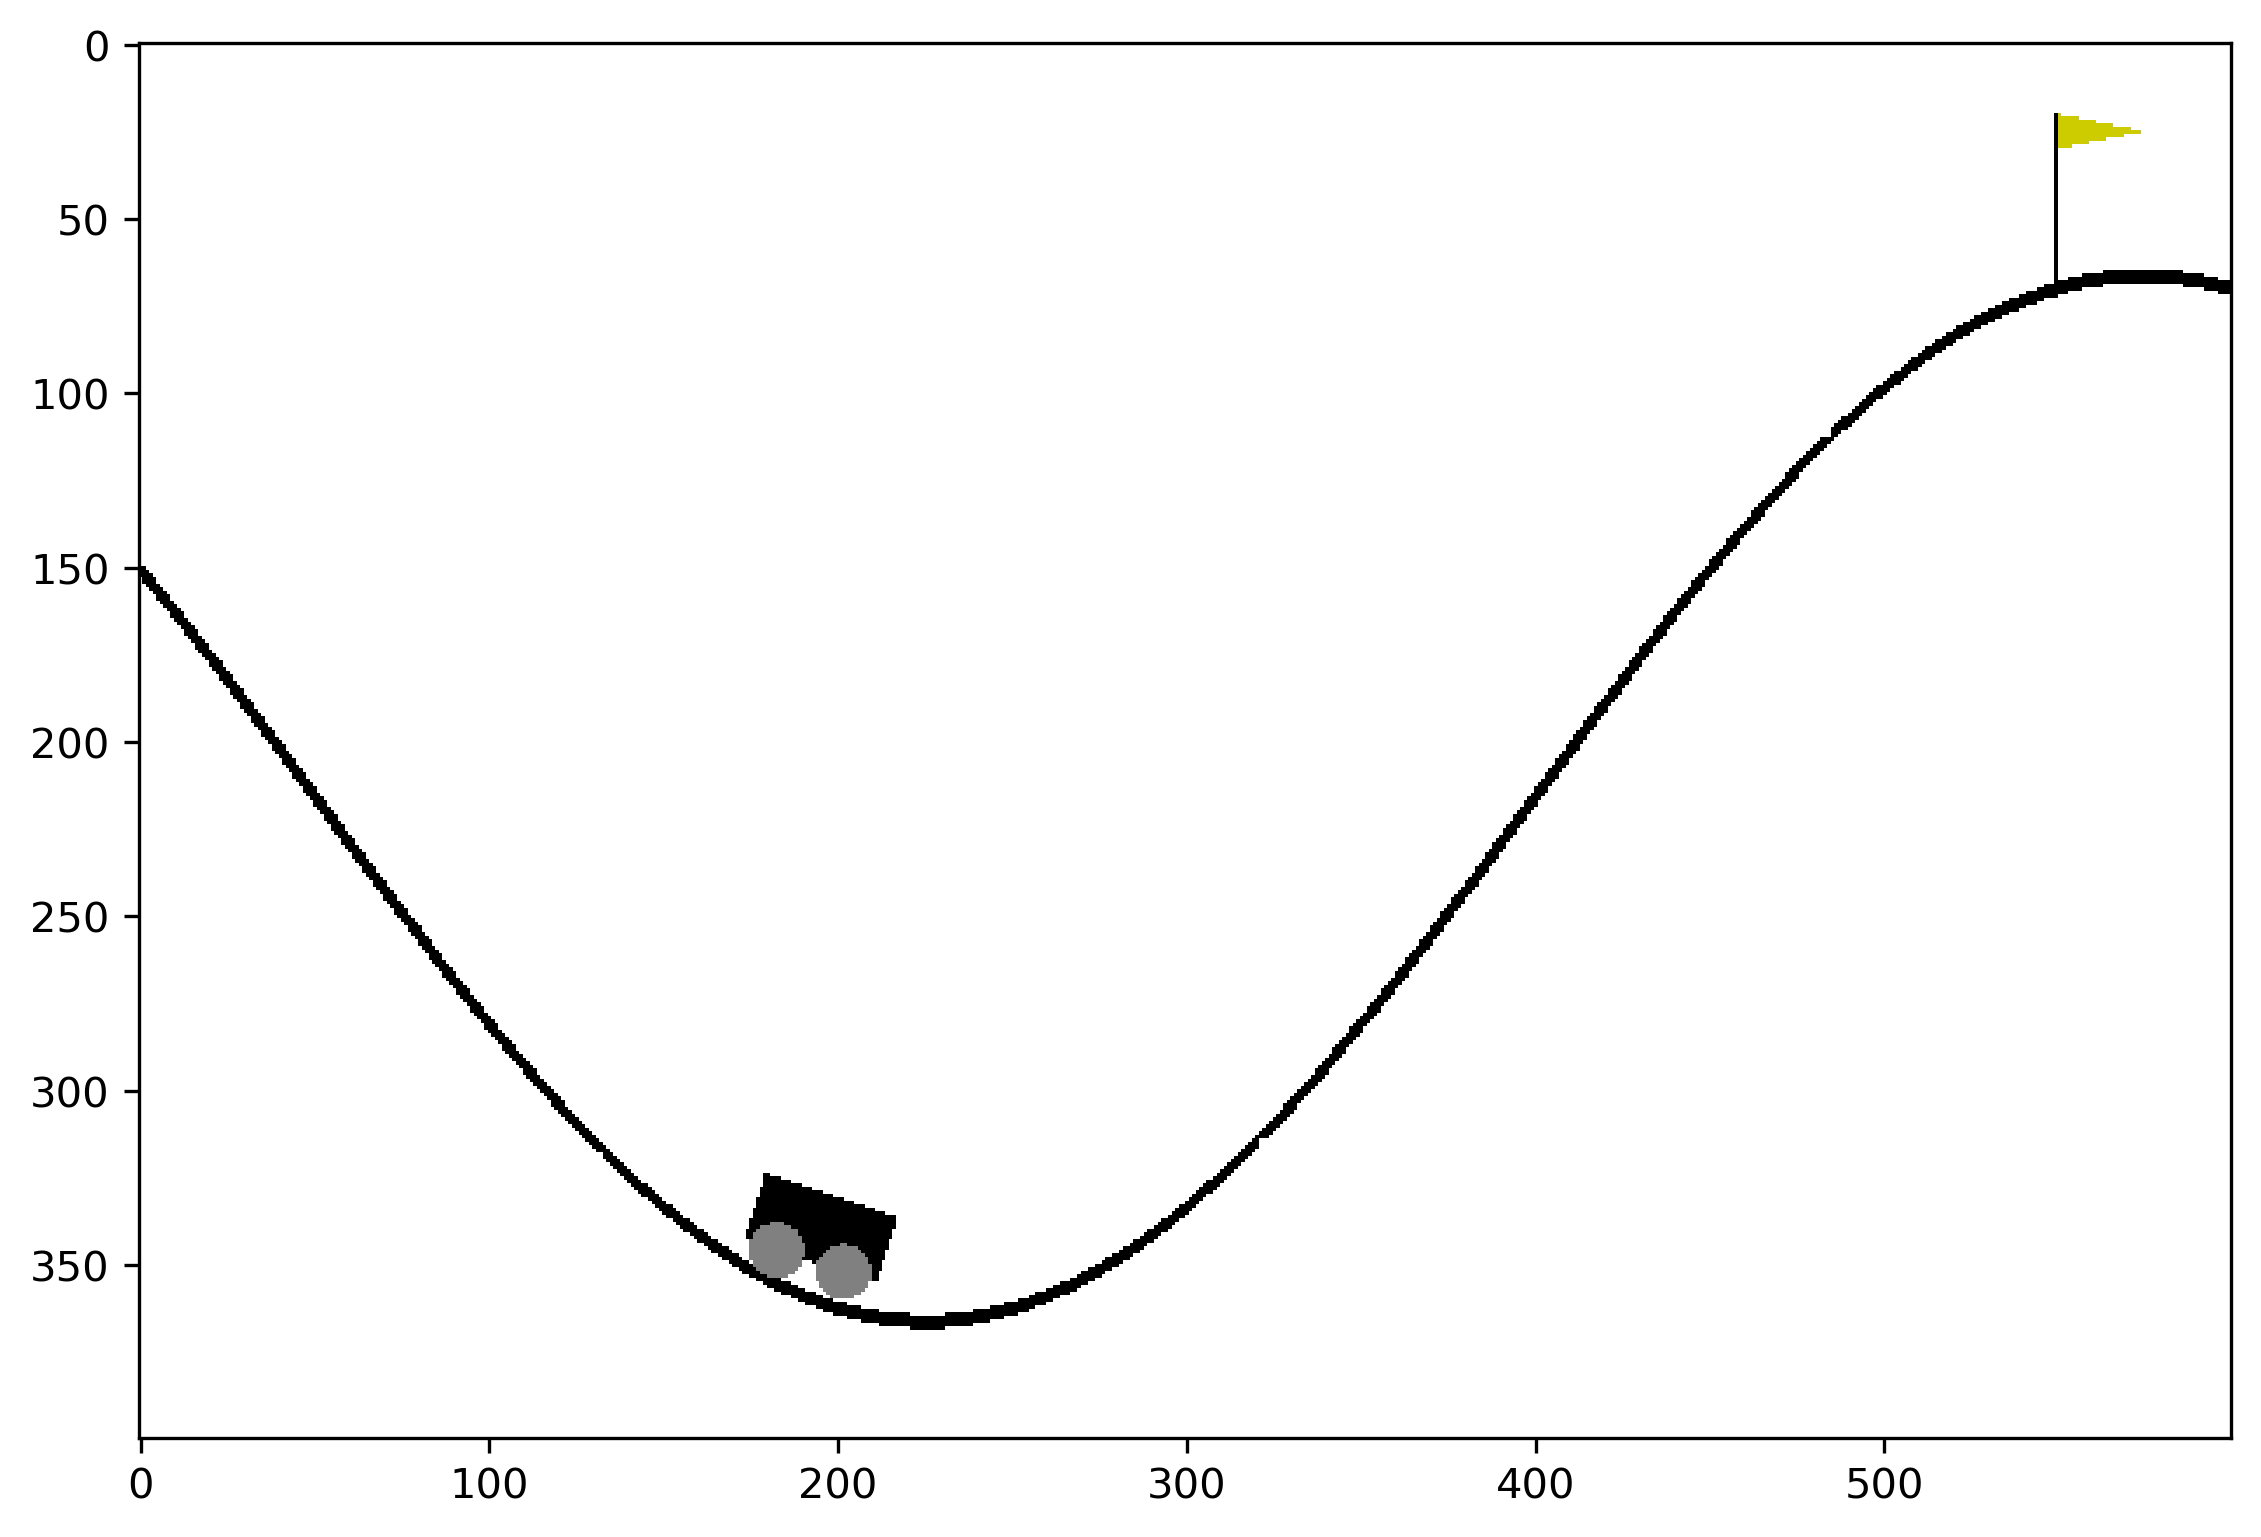

In [3]:
from utils.gym import gymplot

env.reset()
img = gymplot.plot_init(env)
for _ in range(100):
    gymplot.plot_next(img, env)
    action = env.action_space.sample()
    env.step(action)
env.close()

Classic control environments in reinforcement learning, such as OpenAI Gym MountainCar can be used for sports such as: skateboarding, snowboarding, skiing and surfing.

Training the model
==================

> "Every loss teaches you something. The quicker you learn from the losses, then forget about the actual losing, the better off you will be. And do it fast!"
>
> Maria Sharapova, Tennis Player, Unstoppable

Let's see how we can train our skateboarder to pump to climb to the top of the half-pipe. I'll be using Actor-Critic method: let's imagine that my skateboarder's coach is providing the feedback to the athlete. In the code below, in just a few lines of code I import actor-critic A2C model from stable\_baselines and instantiate it with the gym environment, in our case MountainCarContinuous-v0:

In [ ]:
import gym
from stable_baselines import A2C

model = A2C('MlpPolicy', 'MountainCarContinuous-v0', verbose=1, tensorboard_log="logs/a2c_mcc_tensorboard/")
model.learn(total_timesteps=25000)
model.save("a2c_mcc")

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Creating environment from the given name, wrapped in a DummyVecEnv.




In actor-critic model there're two networks in play: one for the actor (our skateboarder), and one for the critic (or policy). The network implementing the policy network is typically based on multi-level perceptron, or MLP (we discussed it in Chapter 4) or a convolution network. The library is integrated with TensorBoard, so I can monitor many aspects of training and even embed in the notebook by using %tensorboard magic:

In [ ]:
import tensorflow as tf
import datetime
# load tensorboard notebook extension
%load_ext tensorboard
# start monitoring
%tensorboard --logdir ./logs/a2c_mcc_tensorboard

Launching TensorBoard...

Once trained, the model is saved in a2c\_mcc file and can be reused. ![][4]To show how it works, simply load the model and use model.predict method to predict the movement:

In [ ]:
import gym
from stable_baselines import A2C

model = A2C.load("a2c_mcc")

env = gym.make('MountainCarContinuous-v0')
obs = env.reset()
img = plot_init(env)
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    plot_next(img, env)

Model Zoo
=========

![](images/ch10/image6.PNG)

Reinforcement learning algorithms are often sensitive to hyperparameters and the number of epochs for training is high. To make use of the best practices and pretrained models (or behavior cloning), reinforcement learning libraries like Stable Baselines include model zoos: sets of hyperparameters you can use in training your models, as well as pretrained models. As practical sport scientists, we often look for best practices and solutions that just work.

For example, to make use of expertly created hyperparameters for our skateboarding problem with a little Python script conveniently called enjoy.py:

In [ ]:
!python enjoy.py \--algo a2c \--env MountainCarContinuous-v0

The fact that some environments are based on continuous and some use discrete actions is the first hint on which algorithm to select. Working with reinforcement learning you may soon realize that different algorithms work better for different problems. In case you wonder how hyperparameters are tuned, feel free to check out libraries like Optuna, which can make a great addition to your data scientist toolbox and help you tune the training. Fortunately, ready-to-use pretrained models are often available as part of model zoos and as part of many libraries.

# Project: Reinforcement Learning in Gymnastics

In gymnastics one of the fundamental tricks is the swing. Let's use reinforcement learning to solve a classic control problem: keeping the gymnast upright. The motion of the swing can be described by the pendulum model. From Newton's second law:

$$F = ma$$

![](images/ch10/image7.PNG)

The angle of rotation is defined as $\theta$, mass of the gymnast is *m* and the radius to the center of mass is *R* and $F_{T}$ is the tension force on the arms. The position of the center of mass of the athlete can be expressed as:

$${x\  = \ R\sin{\text{θ\ }\left( t \right)}
}{y\  = \ R\cos{\theta\ (t)}\ }$$

The angular velocity relative to the center of mass is $R\frac{\text{dθ}}{\text{dt}}$ and acceleration is $R\frac{d^{2}\theta}{dt^{2}}$. The resulting force is equal to:

$$F = ma = F_{T} - mg\cos\theta$$

Since the gymnast is performing a circular movement with radius R and a speed $\omega$, the resulting acceleration is centripetal directed towards the center of rotation:

$$F_{T} = mg\cos\theta + m\frac{\omega^{2}}{R}$$

With this definition of the physical model for pendulum, and applications in gymnastics, such as high swing, let's see how reinforcement learning can help simulating one of the fundamental tricks in gymnastics.

Pendulum model
==============

In OpenAI gym among classic control problems that reinforcement learning can solve, there's an environment for a pendulum. Let's instantiate and plot this environment in the notebook with some sample actions, visualizing a random simulation:

In [ ]:
env = gym.make('Pendulum-v0')
env.reset()
img = plot_init(env)
for _ in range(100):
    plot_next(img, env)
    action = env.action_space.sample()
    env.step(action)
env.close()

![](images/ch10/image8.PNG)

Let's examine the pendulum environment closely: the action space is continuous, a real number in the range \[-2.0,2.0\], and the observation space is defined by values: $\cos{\theta:\lbrack - 1.0,\ 1.0\rbrack}$, $\sin{\theta\ :\lbrack - 1.0,\ 1.0\rbrack}$, dot theta$\ \dot{\theta}:\lbrack - 2.0,\ 2.0\rbrack$, where $\theta:\lbrack - \pi,\pi\rbrack$. The goal is to remain at zero angle, with the least effort. The earlier simulation shows a pendulum moving in a circular motion, but randomly. In order to perform an action simulating a high swing in gymnastics with the pendulum model, we can train the model to do it, or load a pretrained model that knows how to do the trick. Fortunately, stable baselines library includes many pretrained environments using various algorithms. Let's load a pretrained actor-critic model that solves the high swing trick:

In [ ]:
import gym
from utils.gym import gymplot
from stable_baselines import A2C

model = A2C.load("data/rl/Pendulum-v0-a2c.pkl")

env = gym.make('Pendulum-v0')
obs = env.reset()
img = gymplot.plot_init(env)
for t in range(200):
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    gymplot.plot_next(img, env)
    if done:
        print(f"Episode finished after {t+1} steps")
        break


When you run this part of the notebook, the simulation shows that the agent swings a few times, then reaches the zero angle, and remains there, which is the condition the pendulum environment is targeting.

Humanoid models
===============

Reinforcement learning scenarios introduced in the beginning of this chapter are great easy examples that help you get started with the concept and get familiar with the tools. Pendulum and MountainCar environments are classic dynamics and control scenarios with some applications introduced in the beginning of this chapter, including half-pipe sports including skateboarding, snowboarding, skiing, surfing, as well as high-bar swing in gymnastics.

Can methods we discussed earlier be used for motion analysis and simulation of full humanoid models?

![Figure: Simulation of a humanoid backflip](images/ch10/image9.PNG)

Joints and action spaces
------------------------

Humanoid models bring us to far more realistic 3D simulations of the humans based on biomechanics, set in a more complex environment, that requires tracking multiple joints in the human body. You will notice many interconnections between robotics, animation, motion capture, gaming and biomechanics, while playing with humanoid models and reinforcement learning. The same models that robotics engineers use in ROS (Robot Operating System) in a format called URDF (Unified Robotic Description Format) can be used in simulations of humanoid models. The following code uses a humanoid model in humanoid.urdf file from PyBullet physics library to list the joints in the humanoid model:

In [25]:
import gym
import pybullet as p
import pybullet_data as pd 

p.connect(p.DIRECT)
p.resetSimulation()
p.setAdditionalSearchPath(pd.getDataPath())
human = p.loadURDF("humanoid/humanoid.urdf")
p.getNumBodies()
for i in range (p.getNumJoints(human)):
    jointInfo=p.getJointInfo(human,i)
    print("joint",jointInfo[0],"name=",jointInfo[1].decode('ascii'))

joint 0 name= root
joint 1 name= chest
joint 2 name= neck
joint 3 name= right_shoulder
joint 4 name= right_elbow
joint 5 name= right_wrist
joint 6 name= left_shoulder
joint 7 name= left_elbow
joint 8 name= left_wrist
joint 9 name= right_hip
joint 10 name= right_knee
joint 11 name= right_ankle
joint 12 name= left_hip
joint 13 name= left_knee
joint 14 name= left_ankle


Visualizing our humanoid model is also easy in PyBullet, we can simply plot the humanoid model loaded earlier into the physics environment with a simple code:

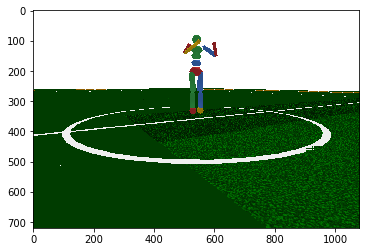

In [3]:
import pybullet as p
import pybullet_data as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from utils.gym.gymbullet import get_camera_image
%matplotlib inline

p.connect(p.DIRECT)
p.resetSimulation()
p.setAdditionalSearchPath(pd.getDataPath()) 
p.setGravity(0,0,-9.8)
p.loadSDF("stadium.sdf")
p.loadMJCF("mjcf/humanoid_fixed.xml")

img = get_camera_image()
plt.imshow(img[2])
plt.draw()
plt.show()
p.disconnect()

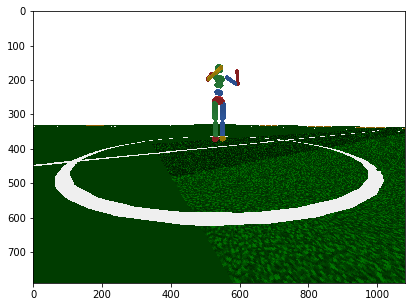

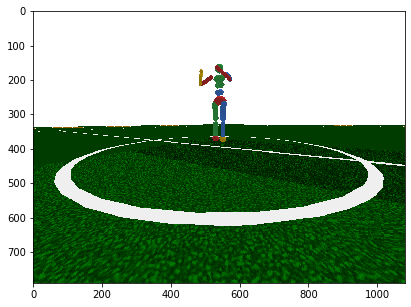

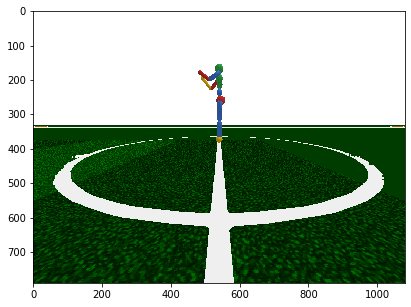

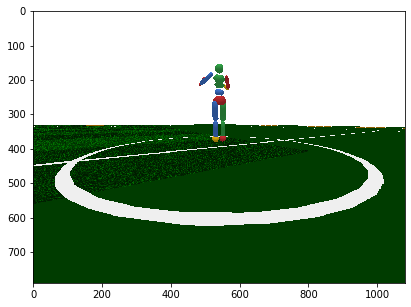

In [2]:
import pybullet as p
import pybullet_data as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from utils.gym.gymbullet import plot_humanoid
%matplotlib inline

p.connect(p.DIRECT)
p.setAdditionalSearchPath(pd.getDataPath())
p.resetSimulation()

plane = p.loadSDF("stadium.sdf")
human = p.loadMJCF("mjcf/humanoid_fixed.xml")

plot_humanoid()

We can also create an animated image, making the camera rotate around the humanoid:

Creating animated png, please wait about 5 seconds


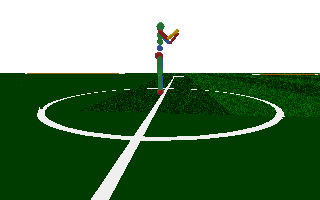

In [4]:
from utils.gym.gymbullet import animated_humanoid
import pybullet as p
import pybullet_data as pd
import matplotlib.pyplot as plt
from matplotlib import pylab
from IPython.display import Image
%matplotlib inline

p.connect(p.DIRECT)
p.setAdditionalSearchPath(pd.getDataPath())
p.resetSimulation()

plane = p.loadSDF("stadium.sdf")
human = p.loadMJCF("mjcf/humanoid_fixed.xml")

ANIMATION = "data/testing/humanoid.png"
animated_humanoid(ANIMATION)
Image(filename=ANIMATION)

Multiple joints in humanoid models increase complexity and number of variables in the action state. For most of the classic control scenarios like Pendulum or MountainCar, action and observation spaces contain just a few variables. For humanoid models we have more variables to track: for example 17 for action space joints and 44 for observation space in the case of PyBullet Humanoid:

In [6]:
import gym
from utils.gym import gymplot
from utils.gym import gymbullet

env,agent = gymbullet.load_humanoid()
print(f'actions: {env.action_space}')
print(f'observations: {env.observation_space}')

WalkerBase::__init__
actions: Box(17,)
observations: Box(44,)


In Part II "Computer Vision" we discussed body pose estimation and humanoid models with multiple joints used in machine learning. In fact, with datasets such as Human3.6M used in VideoPose3D, 3D human pose estimation we discussed in Part II, the approach of training the model with reinforcement learning has also been included in PyBullet library from an excellent research paper on DeepMimic, applying a synthesis of mocap data with reinforcement learning.

Human Motion Capture 
---------------------------

For humanoid models training with reinforcement learning, we need to be able to have a recording of human motion or mocap. There're many ways to record human movement: video is the obvious choice. But one issue arises quickly with any video because it often includes occluded areas, for example if our camera is facing the right part of the body it's hard to see the what's happening with the left hand. From Part II "Computer Vision", you learned some of the methods for 2D and 3D body pose reconstruction. In the professional game animation however, instead of inferred data, motion capture often uses more precise ground truth methods to capture precise movements of the human body. This empirical data captured with multiple sensor devices, such as IMUs (discussed earlier in Part I) doesn't suffer from occlusion and provides a very high frequency data of human movement. For example, an inexpensive accelerometer and gyroscope provide a 3D vector of acceleration and rotation at a rate of 100 samples per second. With professional full 3D body sensor suits like XSens, combining 17 synchronized and calibrated sensors positioned to capture motion of every major joint, the task of collecting high quality ground truth data becomes easy.

Collecting motion capture data has been an extensive area of research, for example Carnegie Mellon University maintains a well-known motion capture database. Most common formats of motion capture file formats are BVH, C3D, FBX. For visualization tools such as Blender, Maya and Unity.

![Figure: Loading a basketball dribbling mocap into Blender](images/ch10/image12.PNG)


Reinforcement Learning for Humanoids 
---------------------------------------

> *By combining a motion-imitation objective with a task objective, we can train characters that react intelligently.*
>
> Xue Bin Ping et al, DeepMimic

What reinforcement learning is truly great at, is the ability to train a humanoid model to perform a realistic action. Without reinforcement learning, models may be based on kinematics or physics, but getting them to perform human-like actions and skills without reinforcement learning has not been very successful: many efforts ended up getting unnatural looking movements. Classical mechanics serves us well, providing a framework in which gravity and basic joint mechanics controls the ragdoll, but firing muscles to move in a certain (and with a certain *style*) requires a human actor for motion insights. To illustrate, let's load an *untrained* humanoid model into gym and let it randomly move, the result is likely our ragdoll falling to the ground:

In [ ]:
# IMPORTANT: You may need to restart the kernel to run this script
import gym
from utils.gym import gymplot
from utils.gym import gymbullet

env,agent = gymbullet.load_humanoid(trained=False)
env.reset()
img = gymplot.plot_init(env)
for _ in range(100):
    gymplot.plot_next(img, env)
    action = env.action_space.sample()
    env.step(action)
env.close()

We created a connected humanoid with joints and placed it into a physics environment under forces of gravity, but we didn't teach it the skills to walk, jump, crawl, standup or make any actions that a human learns throughout his life. Let's load a trained model, with some weights, and instead of making random motions let's make it act using predicted movements:

In [ ]:
# IMPORTANT: You may need to restart the kernel to run this script
import gym
from utils.gym import gymplot
from utils.gym import gymbullet

env,agent = gymbullet.load_humanoid(trained=True)
obs = env.reset()
img = gymplot.plot_init(env)
for i in range(0, 30000):
    action = agent.act(obs)
    obs, r, done, _ = env.step(action)
    gymplot.plot_next(img,env)
    if done:
        break

You can see that with a trained model, results are much better, the humanoid is no longer falling, but instead it is walking.

Summary
=======

Reinforcement learning has many applications in sports, biomechanics, games, animation and industrial applications. In this chapter we learn and apply reinforcement learning environments for various sports: skateboarding, snowboarding, surfing, gymnastics and others; beginning with classic control problems that can be described by just a few action states, and moving on to more complex areas of biomechanics describing human body with multiple connected joints, containing many degrees of freedom and multiple action states.

In the last years, reinforcement learning methods evolved that allow very close simulation of movements, such as state-of-the art DeepMimic. We also have new tools, such as OpenAI gym that include simulation environments, specialized RL libraries such as gym baselines, KerasRL as well as evolution of generic deep learning frameworks to support reinforcement learning.